## 3,2Perceptron training Using sklearn

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))



Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.3, random_state=1, stratify=y)


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40,eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

C:\Users\yueki\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=40, n_iter=None, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [5]:
# Predict using test data
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy rate: %4f' % ((y_test != y_pred).sum() / len(y_test)) )



Misclassified samples: 3
Accuracy rate: 0.066667


In [6]:
# Predict using test data : Patern2

from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))


Accuracy: 0.93
Accuracy: 0.93


### Ploting decision region

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    
    # marker & color-map
    markers = ('s', 'x','o','^','v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    cmap   = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() +1    
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
                           
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black'
                   )
    
    if test_idx:
        
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidth=1,
                   marker='o',
                   s=100,
                   label='test set'
                   
                  )
        

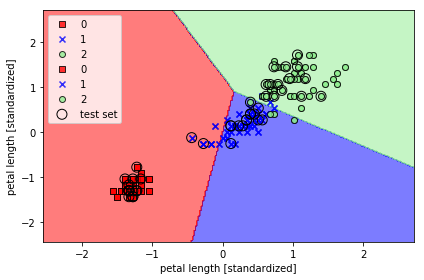

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn,test_idx=range(105,150))

plt.xlabel(('petal length [standardized]'))
plt.ylabel(('petal length [standardized]'))
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
